In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import StandardScaler


LR=LinearRegression(fit_intercept=True)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
dataset = dataset.drop('State', axis=1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values #-1 selects last column regardless of column count (column 3 is State) So with state column dropped, [:, -1] selects whole dataset besides state 
dataset

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


Step 2: Get the Data

    2.3: Data Fetch Routine #local for now
    TODO: auto fetch to new devices?

2.8: Convert the data to a format you can easily manipulate (without changing the data itself).

### 2.10 Check the size and type of data

In [ ]:
# Print the size of the dataset
print("Size of the dataset:")
print(dataset.shape)

# Print the data types of the columns
print("\nData types:")
print(dataset.dtypes)

print("\nDataset information:")
print(dataset.info())

# Check memory usage of the dataset
print("\nMemory usage:")
print(dataset.memory_usage(deep=True))

Size of the dataset:
(50, 4)

Data types:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB
None

Memory usage:
Index              132
R&D Spend          400
Administration     400
Marketing Spend    400
Profit             400
dtype: int64


### 2.11: Test Set

In [ ]:
dataset["R&D Spend_cat"] = pd.cut(dataset["R&D Spend"], # Apply binning to 'R&D Spend' column
                                   [0, 100000, 200000, 300000, 400000, np.inf], 
                                   labels=[1, 2, 3, 4, 5],
                                   include_lowest=True)

In [ ]:
strat_train_set, strat_test_set = train_test_split(dataset, test_size=0.1, # Split the dataset into training and testing sets
                                                   stratify=dataset["R&D Spend_cat"],
                                                   random_state=42)

40

In [ ]:
X_train = strat_train_set.drop(columns=["Profit"]) #for training set
y_train = strat_train_set["Profit"]

X_test = strat_test_set.drop(columns=["Profit"]) #for testing set
y_test = strat_test_set["Profit"]

### Step 3.3 Study each attribute and its characteristics

In [5]:
# Print the names of the columns in the dataset
print("Column names:")
print(dataset.columns)

Column names:


NameError: name 'dataset' is not defined

In [ ]:
# Print the data types of the columns
print("Data types:")
print(dataset.dtypes)

Data types:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object


In [ ]:
# Calculate and print the percentage of missing values in each column
print("% of missing values:")
print(dataset.isnull().mean() * 100)

% of missing values:
R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
Profit             0.0
dtype: float64


In [ ]:
# Print the skewness of each column to get an idea of the type of distribution
numeric_columns = dataset.select_dtypes(include=['float64']).columns
print("Skewness:")
print(dataset.skew())

Skewness:
R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64


In [ ]:
# Display summary statistics for numeric attributes
print("Summary Statistics:")
print(dataset.describe())

Summary Statistics:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


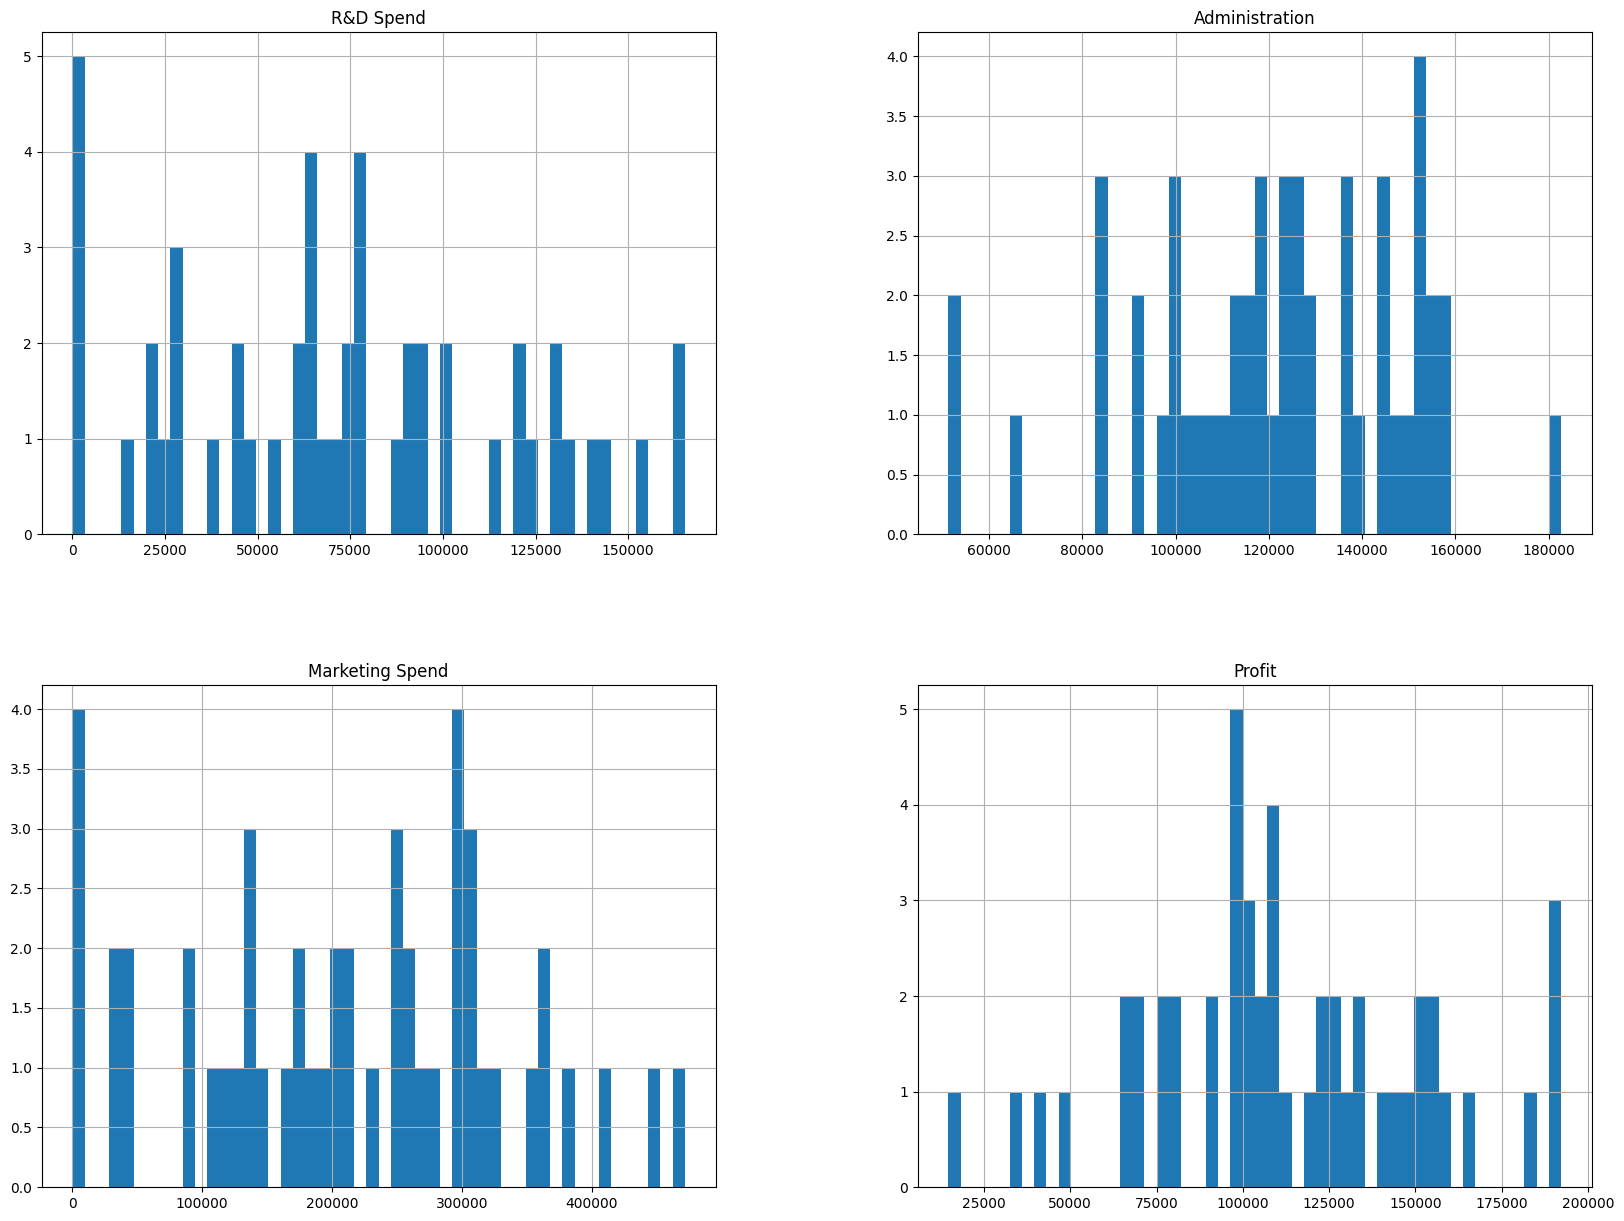

In [ ]:
# Plot a histogram for each numerical attribute
dataset.hist(bins=50, figsize=(20,15))
plt.show()

### Step 3.6 Correlation between attributes (Scatter matrix with correlation results)

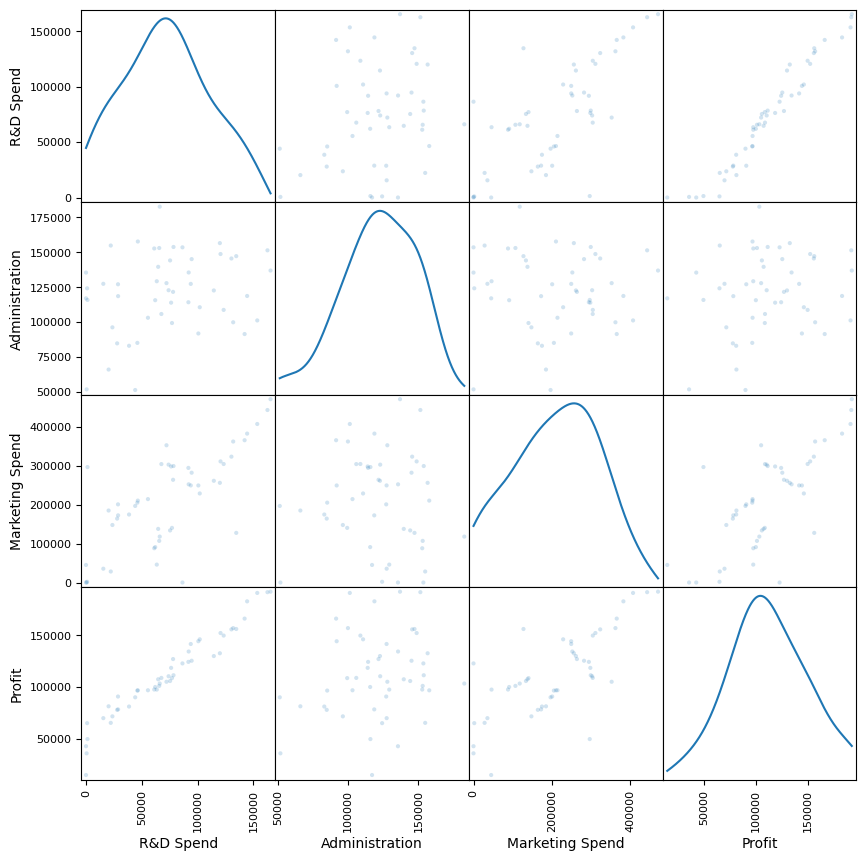

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [ ]:
# Create a scatter matrix of the features in the dataset
scatter_matrix(dataset, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

# Print the correlation matrix of the features in the dataset
print(dataset.corr())

### 3.8 Experiment with attribute combinations

In [ ]:
# Create new attributes by combining existing ones
dataset['RD_to_Marketing'] = dataset['R&D Spend'] / dataset['Marketing Spend']
dataset['Admin_to_Marketing'] = dataset['Administration'] / dataset['Marketing Spend']
dataset['RD_to_Admin'] = dataset['R&D Spend'] / dataset['Administration']

print(dataset.corr())

                    R&D Spend  Administration  Marketing Spend    Profit  \
R&D Spend            1.000000        0.241955         0.724248  0.972900   
Administration       0.241955        1.000000        -0.032154  0.200717   
Marketing Spend      0.724248       -0.032154         1.000000  0.747766   
Profit               0.972900        0.200717         0.747766  1.000000   
RD_to_Marketing      0.238382        0.390420        -0.385462  0.196444   
Admin_to_Marketing  -0.291931        0.048160        -0.360541 -0.238996   
RD_to_Admin          0.923485       -0.084226         0.736811  0.917487   

                    RD_to_Marketing  Admin_to_Marketing  RD_to_Admin  
R&D Spend                  0.238382           -0.291931     0.923485  
Administration             0.390420            0.048160    -0.084226  
Marketing Spend           -0.385462           -0.360541     0.736811  
Profit                     0.196444           -0.238996     0.917487  
RD_to_Marketing            1.000000 

### 4.2 Feature selection

In [ ]:
# Drop the 'RD_to_Marketing' and 'Admin_to_Marketing' columns from the dataset
dataset = dataset.drop(['RD_to_Marketing', 'Admin_to_Marketing'], axis=1)

### 4.5 Feature Scaling


In [ ]:
# Create a pipeline with StandardScaler and LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Use the pipeline to fit the data
pipeline.fit(X, y)

# Use the pipeline to make predictions
predictions = pipeline.predict(X)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y, predictions, squared=False)
print(f'Root Mean Square Error: {rmse}')

# Calculate the MAE of the predictions
mae = mean_absolute_error(y, predictions)
print(f'Mean Absolute Error: {mae}')

Root Mean Square Error: 8855.344489015142
Mean Absolute Error: 6471.450396104808


In [ ]:
#train test set
pipeline.fit(X_train, y_train)
#predict test set
predictions = pipeline.predict(X_test)

#evaluate+print test metrics
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

### Step 6.1 Fine-Tune the hyperparameters using cross-validation (Grid search on the LinearRegression algorithm)

In [4]:
# Defining pipeline and parameter grid
pipeline = make_pipeline(StandardScaler(), LinearRegression())
param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__copy_X': [True, False],
    'linearregression__n_jobs': [None, -1, 1, 2, 4],
    #'linearregression__positive': [True, False]
    
}

# Instantiate GridSearchCV with the specified parameters and MAE as the scoring metric
grid_search_mae = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Perform the grid search on the data
grid_search_mae.fit(X, y)

# Get the best hyperparameters from the grid search
best_params_mae = grid_search_mae.best_params_

# Print the full grid search results
print("Grid Search Results with MAE:")
cv_results_mae = pd.DataFrame(grid_search_mae.cv_results_)
print(cv_results_mae)

# Print the best hyperparameters
print(f'Best Hyperparameters with MAE: {best_params_mae}')

# Access the best model from the grid search
best_model_mae = grid_search_mae.best_estimator_

# Use the best model for predictions
predictions_mae = best_model_mae.predict(X)


NameError: name 'make_pipeline' is not defined

NameError: name 'mean_squared_error' is not defined

In [ ]:
# Define your pipeline and parameter grid
pipeline = make_pipeline(StandardScaler(), LinearRegression())
param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__copy_X': [True, False],
    'linearregression__n_jobs': [None, -1, 1, 2, 4],
}

# Instantiate GridSearchCV with the specified parameters and scoring as neg_mean_squared_error
grid_search_rmse = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search on the data
grid_search_rmse.fit(X, y)

# Print the full grid search results
print("Grid Search Results with RMSE:")
cv_results_rmse = pd.DataFrame(grid_search_rmse.cv_results_)
print(cv_results_rmse)

# Get the best hyperparameters from the grid search
best_params_rmse = grid_search_rmse.best_params_

# Print the best hyperparameters
print(f'Best Hyperparameters with RMSE: {best_params_rmse}')

# Access the best model from the grid search
best_model_rmse = grid_search_rmse.best_estimator_

# Use the best model for predictions
predictions_rmse = best_model_rmse.predict(X)


Grid Search Results with RMSE:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002201      0.000246         0.001001    3.234067e-07   
1        0.002300      0.000403         0.000999    3.158337e-04   
2        0.001999      0.000002         0.000900    1.997764e-04   
3        0.002501      0.000447         0.001101    1.990245e-04   
4        0.002800      0.000748         0.000800    2.457713e-04   
5        0.002200      0.000510         0.001100    1.995573e-04   
6        0.002500      0.000315         0.001500    1.000214e-03   
7        0.003400      0.001241         0.001200    2.456321e-04   
8        0.002200      0.000510         0.001301    5.106412e-04   
9        0.002600      0.000375         0.000999    1.393475e-06   
10       0.002500      0.000548         0.001200    4.001502e-04   
11       0.002899      0.000490         0.001100    2.000106e-04   
12       0.002800      0.000678         0.001000    3.167334e-04   
13       0.002499

In [ ]:
# Results for MAE and RMSE grid searches stored in variables like below:
cv_results_mae = pd.DataFrame(grid_search_mae.cv_results_)
best_params_mae = grid_search_mae.best_params_
best_model_mae = grid_search_mae.best_estimator_
best_score_mae = -grid_search_mae.best_score_  # Note the negative sign for MAE

cv_results_rmse = pd.DataFrame(grid_search_rmse.cv_results_)
best_params_rmse = grid_search_rmse.best_params_
best_model_rmse = grid_search_rmse.best_estimator_
best_score_rmse = -grid_search_rmse.best_score_  # Note the negative sign for RMSE

# Compare and select the best model
if best_score_mae < best_score_rmse:
    best_model = best_model_mae
    best_params = best_params_mae
    best_score = best_score_mae
    print("Selected Model: MAE")
else:
    best_model = best_model_rmse
    best_params = best_params_rmse
    best_score = best_score_rmse
    print("Selected Model: RMSE")

# Print the best hyperparameters and score
print(f'Best Hyperparameters: {best_params}')
print(f'Best Score: {best_score}')

# Access the best model
predictions = best_model.predict(X)

# Print the predictions -  array of predicted values generated by the best model for the input data X
print("Predictions:")
print(predictions)


Selected Model: MAE
Best Hyperparameters: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': None}
Best Score: 7040.688205832627
Predictions:
[192521.25289008 189156.76823226 182147.2790962  173696.70002553
 172139.51418327 163580.7805712  158114.09666865 160021.36304781
 151741.69969865 154884.68410995 135509.01636714 135573.71296074
 129138.05418243 127487.99166275 149548.64633453 146235.1599852
 116915.40540144 130192.44720781 129014.2268059  115635.21636716
 116639.6692309  117319.45164029 114706.98171695 109996.61522126
 113362.96611314 102237.72506481 110600.5753503  114408.07145684
 101660.02600497 101794.98345176  99452.37293606  97687.85627575
  99001.32898549  97915.00780465  89039.27374116  90511.59956753
  75286.17458546  89619.5377079   69697.43064804  83729.01197692
  74815.95399105  74802.55623866  70620.41182056  60167.03996335
  64611.3549157   47650.64968691  56166.20685261  46490.58898335
  49171.38815763  48215.13

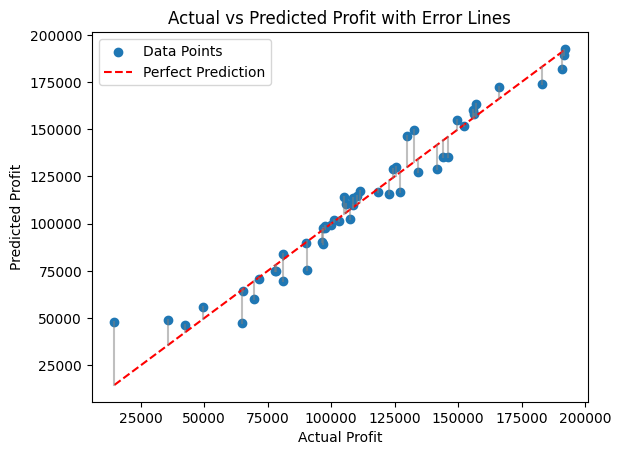

In [ ]:
# Scatter plot for actual vs predicted values with error lines
plt.scatter(y, predictions, label='Data Points')
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
for i in range(len(y)):
    plt.plot([y[i], y[i]], [y[i], predictions[i]], '-', color='gray', alpha=0.5)  # Lines connecting actual and predicted values
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit with Error Lines')
plt.legend()
plt.show()